#### What is Ordinal Logistic Regression?

###### _From Wikipedia_
For example, if one question on a survey is to be answered by a choice among "poor", "fair", "good", and "excellent", and the purpose of the analysis is to see how well that response can be predicted by the responses to other questions, some of which may be quantitative, then ordered logistic regression may be used. It can be thought of as an extension of the logistic regression model that applies to dichotomous dependent variables, allowing for more than two (ordered) response categories. I am going to make three categories of quality ie: low, medium, high

In [78]:
RedWineQuality <- read.csv("~/Desktop/Nanodegree/wineQualityReds.csv")

In [79]:
#Libraries We use.
library(ggplot2)
library(gridExtra)
library(caret)
library(lattice)
library(MASS)

In [80]:
head(RedWineQuality)

X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [81]:
tail(RedWineQuality)

,X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1594,1594,6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
1595,1595,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1596,1596,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,1597,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1598,1598,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
1599,1599,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


In [82]:
str(RedWineQuality)

'data.frame':	1599 obs. of  13 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


In [83]:
summary(RedWineQuality)

       X          fixed.acidity   volatile.acidity  citric.acid   
 Min.   :   1.0   Min.   : 4.60   Min.   :0.1200   Min.   :0.000  
 1st Qu.: 400.5   1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090  
 Median : 800.0   Median : 7.90   Median :0.5200   Median :0.260  
 Mean   : 800.0   Mean   : 8.32   Mean   :0.5278   Mean   :0.271  
 3rd Qu.:1199.5   3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420  
 Max.   :1599.0   Max.   :15.90   Max.   :1.5800   Max.   :1.000  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.900   Min.   :0.01200   Min.   : 1.00       Min.   :  6.00      
 1st Qu.: 1.900   1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00      
 Median : 2.200   Median :0.07900   Median :14.00       Median : 38.00      
 Mean   : 2.539   Mean   :0.08747   Mean   :15.87       Mean   : 46.47      
 3rd Qu.: 2.600   3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00      
 Max.   :15.500   Max.   :0.61100   Max.   :72.00       Max.   :289.0

NO, NA values our data looks awesome.

In [84]:
# Remove Unnecessary column X.
RedWineQuality$X <- NULL
colnames(RedWineQuality)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

I want to change qulity into categorical variable so that I can use Logistic regression on it. 

In [85]:
RedWineQuality$rating<- ifelse(RedWineQuality$quality <= 4, 'Low', 
                               ifelse(RedWineQuality$quality < 7, 'Medium',
  ifelse(RedWineQuality$quality <=8, 'High'
  
  )
)
)

In [86]:
colnames(RedWineQuality)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "rating"

In [87]:
table(RedWineQuality$quality)
table(RedWineQuality$rating)


  3   4   5   6   7   8 
 10  53 681 638 199  18 


  High    Low Medium 
   217     63   1319 

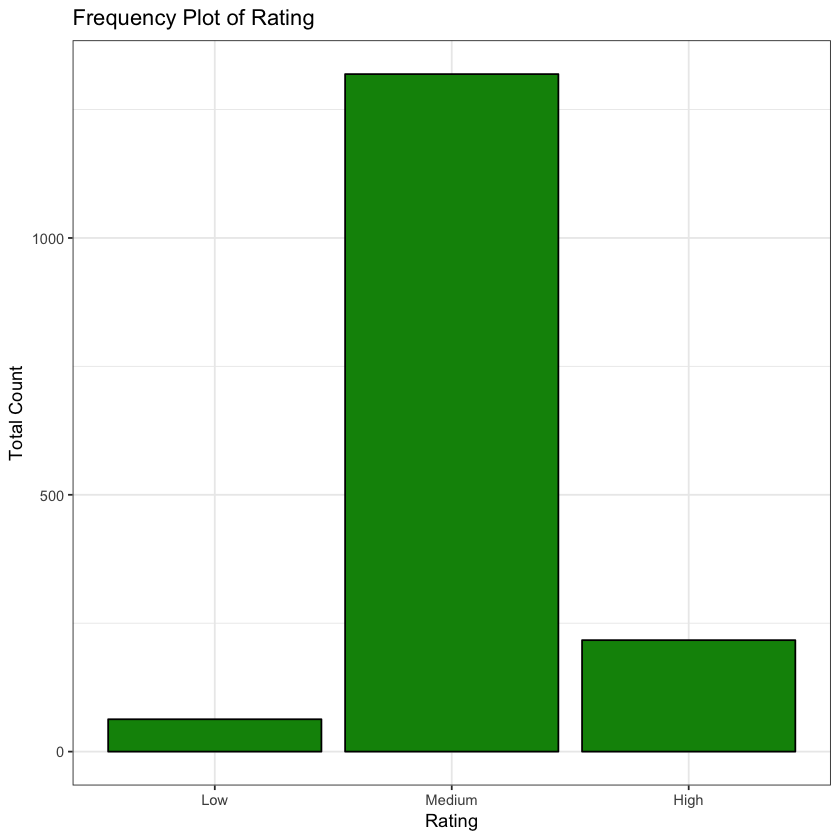

In [88]:
library(ggplot2)
RedWineQuality$rating <- factor(RedWineQuality$rating, levels = c("Low", "Medium", "High"))
ggplot(aes(x= rating), data = RedWineQuality) + 
geom_bar(stat = "count", color= I('Black'), 
fill = I('#099009')) + xlab("Rating") + ylab("Total Count") + ggtitle("Frequency Plot of Rating") + theme_bw()

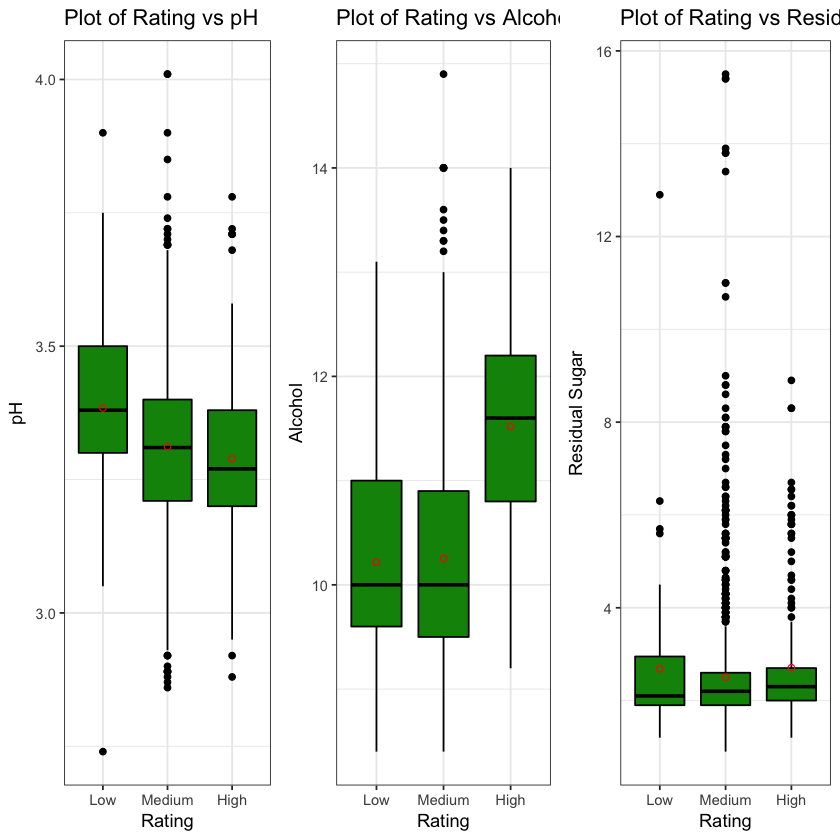

In [89]:
library(gridExtra)
ph <- ggplot(aes(x= rating, y = pH), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("pH") + ggtitle("Plot of Rating vs pH") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

alch <- ggplot(aes(x= rating, y = alcohol), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("Alcohol") + ggtitle("Plot of Rating vs Alcohol") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

sugr <- ggplot(aes(x= rating, y = residual.sugar), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("Residual Sugar") + ggtitle("Plot of Rating vs Residual Sugar") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

grid.arrange(ph, alch, sugr, ncol  = 3)

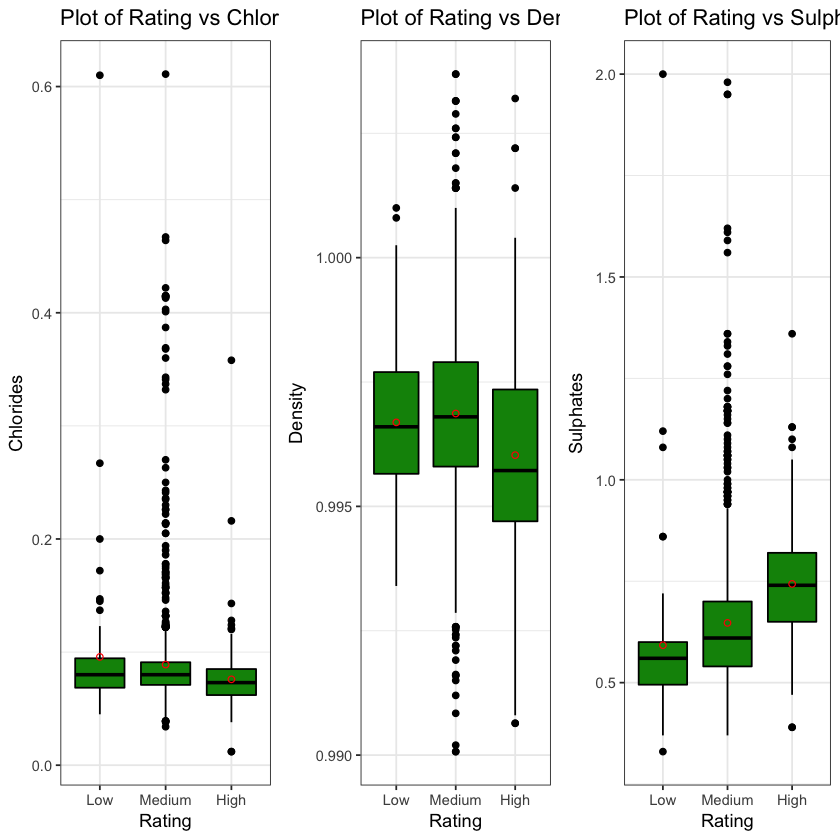

In [90]:
chlo <- ggplot(aes(x= rating, y = chlorides), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("Chlorides") + ggtitle("Plot of Rating vs Chloride") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

denst <- ggplot(aes(x= rating, y = density), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("Density") + ggtitle("Plot of Rating vs Density") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

sulp <- ggplot(aes(x= rating, y = sulphates), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("Sulphates") + ggtitle("Plot of Rating vs Sulphates") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

grid.arrange(chlo, denst, sulp, ncol  = 3)

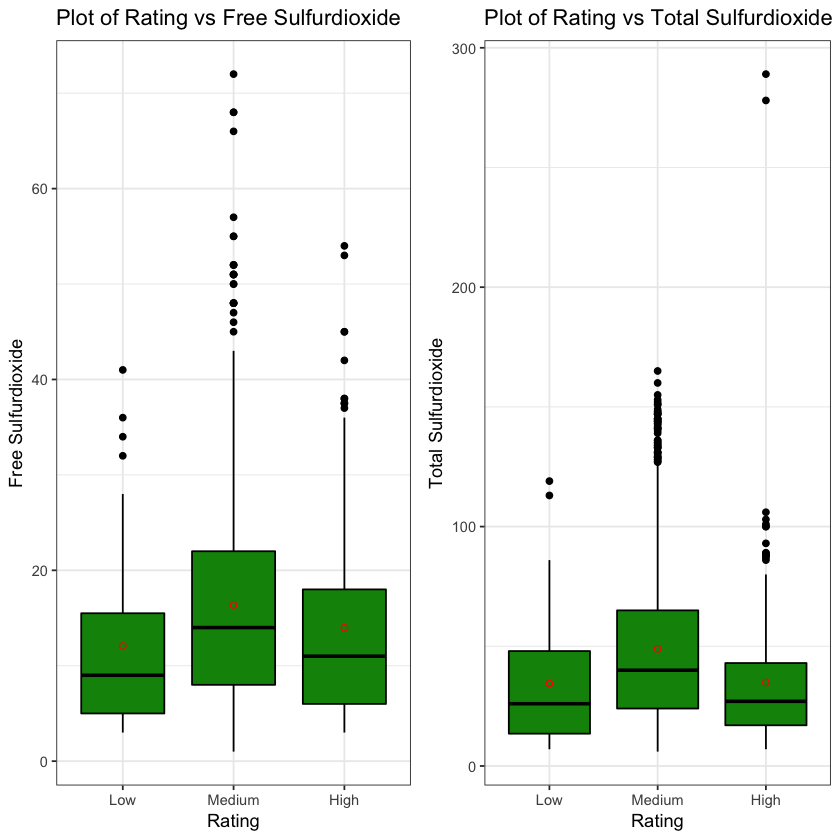

In [91]:
FreeSulfr <- ggplot(aes(x= rating, y = free.sulfur.dioxide), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("Free Sulfurdioxide") + ggtitle("Plot of Rating vs Free Sulfurdioxide") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

TtlSulfr <- ggplot(aes(x= rating, y = total.sulfur.dioxide), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("Total Sulfurdioxide") + ggtitle("Plot of Rating vs Total Sulfurdioxide") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

grid.arrange(FreeSulfr, TtlSulfr, ncol  = 2)

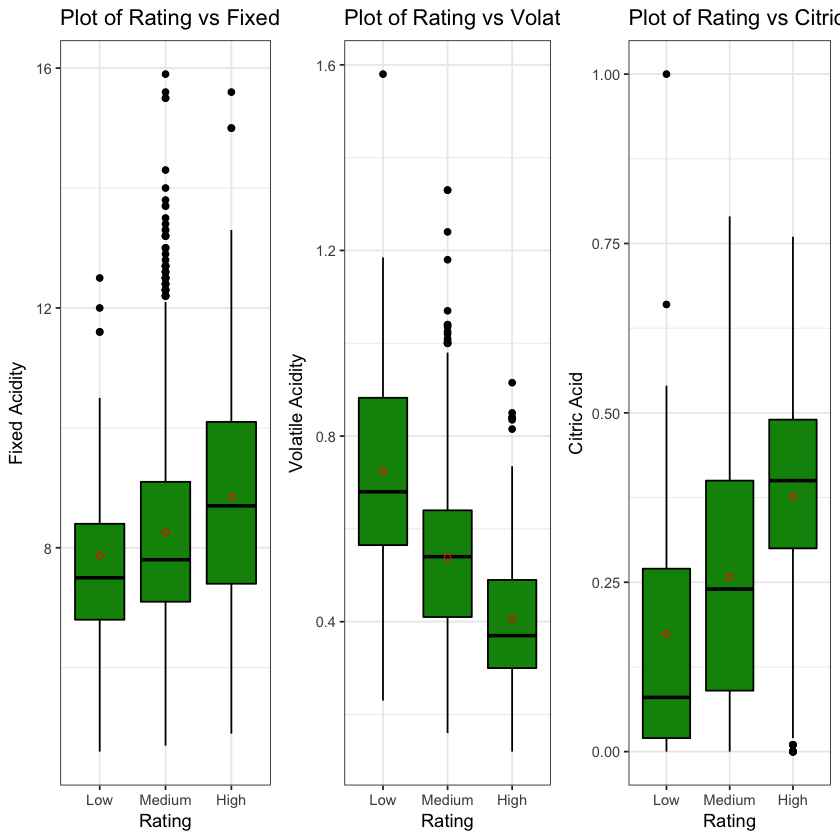

In [92]:
facidty <- ggplot(aes(x= rating, y = fixed.acidity), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("Fixed Acidity") + ggtitle("Plot of Rating vs Fixed Acidity") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

vacidity <- ggplot(aes(x= rating, y = volatile.acidity), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("Volatile Acidity") + ggtitle("Plot of Rating vs Volatile Acidity") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

cacidity <- ggplot(aes(x= rating, y = citric.acid), data  =RedWineQuality) + geom_boxplot(color= I('Black'), fill = I('#099009')) + xlab("Rating") + ylab("Citric Acid") + ggtitle("Plot of Rating vs Citric Acid") + theme_bw() + stat_summary(fun.y = mean, geom = 'point', shape = 1, color = "red")

grid.arrange(facidty, vacidity, cacidity, ncol  = 3)

In [93]:
RedWineQuality1 <- subset(RedWineQuality, select = -c(quality))
colnames(RedWineQuality1)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "rating"

### Data Partition

In [94]:
library(caret)
library(lattice)
set.seed(1234)
trainIndex_rating <- createDataPartition(RedWineQuality1$rating, p = .8, list = FALSE)
head(trainIndex_rating)
train_data_glm <- RedWineQuality1[trainIndex_rating, ]
test_data_glm <- RedWineQuality1[-trainIndex_rating, ]

Resample1
1
2
3
4
6
7


In [95]:

## fit ordered logit model and store results 'model_glm'
#install.packages("MASS")
library(MASS)
model_glm <- polr(rating ~ ., data = train_data_glm, Hess=TRUE)

## view a summary of the model
summary(model_glm)

Call:
polr(formula = rating ~ ., data = train_data_glm, Hess = TRUE)

Coefficients:
                         Value Std. Error  t value
fixed.acidity         0.004975    0.07663  0.06492
volatile.acidity     -3.917573    0.60394 -6.48668
citric.acid           0.084420    0.73011  0.11563
residual.sugar        0.010362    0.06550  0.15820
chlorides            -6.093536    2.12973 -2.86118
free.sulfur.dioxide   0.010037    0.01054  0.95213
total.sulfur.dioxide -0.005121    0.00355 -1.44260
density               9.798560    1.48210  6.61126
pH                   -1.649586    0.77563 -2.12676
sulphates             2.424603    0.49171  4.93097
alcohol               0.915688    0.08887 10.30353

Intercepts:
            Value   Std. Error t value
Low|Medium   8.7782  1.5194     5.7772
Medium|High 15.4518  1.5451    10.0008

Residual Deviance: 1097.618 
AIC: 1123.618 

In [96]:
library(MASS)
# Perform stepwise model selection
step_glm <- stepAIC(model_glm, direction = "both")

Start:  AIC=1123.62
rating ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol

                       Df    AIC
- fixed.acidity         1 1121.6
- citric.acid           1 1121.6
- density               1 1121.7
- residual.sugar        1 1122.1
- free.sulfur.dioxide   1 1122.5
<none>                    1123.6
- total.sulfur.dioxide  1 1123.7
- pH                    1 1125.1
- chlorides             1 1129.6
- sulphates             1 1143.0
- volatile.acidity      1 1163.5
- alcohol               1 1176.2

Step:  AIC=1121.59
rating ~ volatile.acidity + citric.acid + residual.sugar + chlorides + 
    free.sulfur.dioxide + total.sulfur.dioxide + density + pH + 
    sulphates + alcohol

                       Df    AIC
- residual.sugar        1 1119.6
- citric.acid           1 1119.6
- density               1 1119.7
- free.sulfur.dioxide   1 1120.5
<none>                    

In [97]:
step_glm$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,1268,1097.618,1123.618
- fixed.acidity,1,0.025858671,1269,1097.592,1121.592
- residual.sugar,1,0.004329646,1270,1097.596,1119.596
- citric.acid,1,0.005797121,1271,1097.602,1117.602
- density,1,0.258333712,1272,1097.860,1115.860
- free.sulfur.dioxide,1,0.892410879,1273,1098.753,1114.753
- total.sulfur.dioxide,1,1.443671913,1274,1100.197,1114.197


In [98]:
fit_final_glm <- polr(rating ~ volatile.acidity + chlorides + pH + sulphates + alcohol, data = train_data_glm, Hess=TRUE)

summary(fit_final_glm)

Call:
polr(formula = rating ~ volatile.acidity + chlorides + pH + sulphates + 
    alcohol, data = train_data_glm, Hess = TRUE)

Coefficients:
                   Value Std. Error t value
volatile.acidity -4.0153    0.51839  -7.746
chlorides        -5.8257    2.04818  -2.844
pH               -1.6450    0.58300  -2.822
sulphates         2.3549    0.48706   4.835
alcohol           0.9193    0.08533  10.773

Intercepts:
            Value   Std. Error t value
Low|Medium  -0.9941  1.9970    -0.4978
Medium|High  5.6322  2.0085     2.8042

Residual Deviance: 1100.197 
AIC: 1114.197 

In [99]:
Pred_glm <- predict(fit_final_glm, data = test_data_glm)

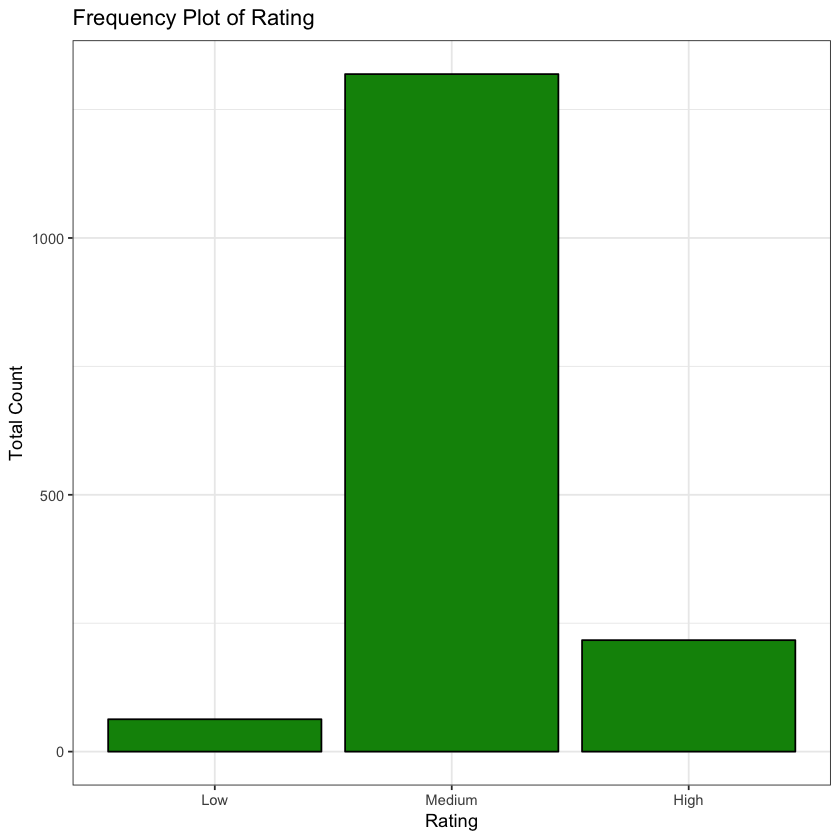

In [100]:
original <- RedWineQuality$rating <- factor(RedWineQuality$rating, levels = c("Low", "Medium", "High"))
ggplot(aes(x= rating), data = RedWineQuality) + 
geom_bar(stat = "count", color= I('Black'), 
fill = I('#099009')) + xlab("Rating") + ylab("Total Count") + ggtitle("Frequency Plot of Rating") + theme_bw()


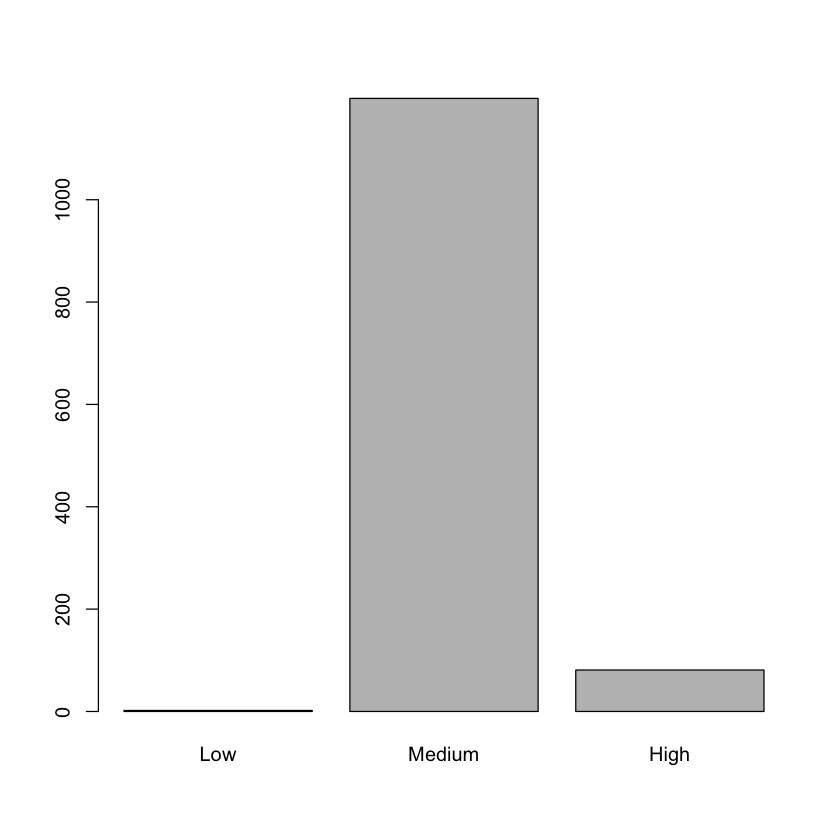

In [101]:
plot(Pred_glm)

The model predicted the test data set as the propertion in our original data set.